# Hamed Torabi

# Vulnerability of cryptocurrencies to 51% attack

Blockchain networks have different challenges to manage nodes. of course, not all people are present in the network with positive goals. 51% attack is a dangerous for networks work with blockchain tech.
So far, no smart solution has been provided to categorize cryptocurrencies in different conditions (in terms of vulnerability). In this notebook, We present a model for classifying cryptocurrencies based on vulnerability.

Notebook, structured with steps:

1. Data description
2. Data visualization
3. Data Cleaning
4. Handling Text and Categorical Attributes
5. Training and test
6. Evaluating the model

We have chosen linear regression for this modeling because its theoretical interpretation is simulated by fuzzy logic and we have built a model accordingly.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib as mpl

In [2]:
df = pd.read_csv("51% attack 2.csv",index_col=0)
df

,Name,number of attack,successful,consensus,Hash rate,sociality,Hash algorithm
number,,,,,,,
1,Vertcoin,4,yes,PoW,mid,mid,Verthash
2,Grin,1,yes,PoW,low,mid,Cuckaroo29
3,Firo,1,yes,PoW,low,mid,Equihash
4,Bitcoin cash,1,no,PoW,mid,mid,SHA-256
5,Bitcoin gold,2,yes,PoW,low,mid,Equihash-BTG
6,Hanacoin,1,yes,PoW,low,low,Lyra2REv2
7,Expanse,1,yes,PoW,low,low,SHA-256
8,Feathercoin,1,yes,PoW,low,mid,NeoScrypt
9,Zencash,1,yes,PoW,low,mid,Equihash


In [7]:
df.describe()

,number of attack
count,15.000000
mean,1.933333
std,1.751190
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


## 2.Data visualization

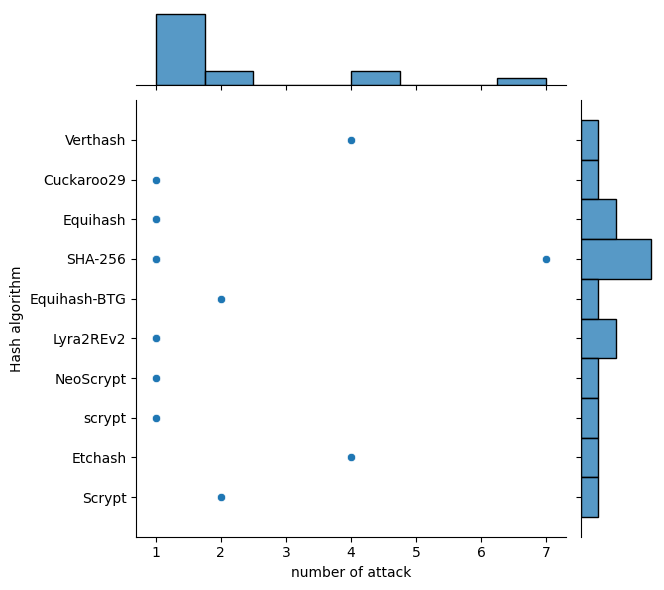

In [18]:
sns.jointplot(x='number of attack' , y='Hash algorithm' , data=df)

According to jointplot, Hash algorithm is not effective factor to vulnerability cryptocurrencies. So we can ignore Hash algorithm.

In jointplot SHA-256 is Attractive target. But this algorithm is the most popular of in crypto So this does not mean it is vulnerable.

<Axes: xlabel='Hash rate', ylabel='count'>

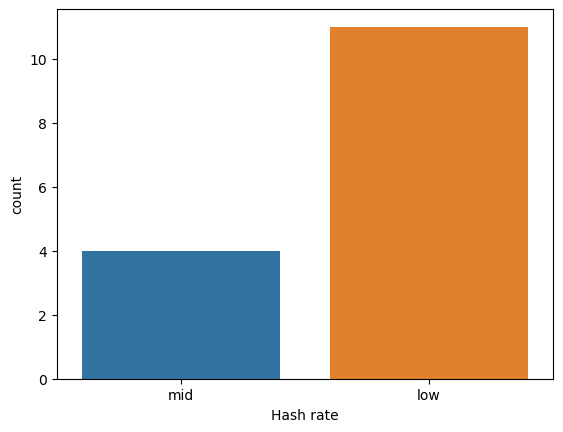

In [20]:
sns.countplot(df,x='Hash rate')

Low Hash rate is dangerous factor for cryptocurrencies.

<Axes: xlabel='sociality', ylabel='count'>

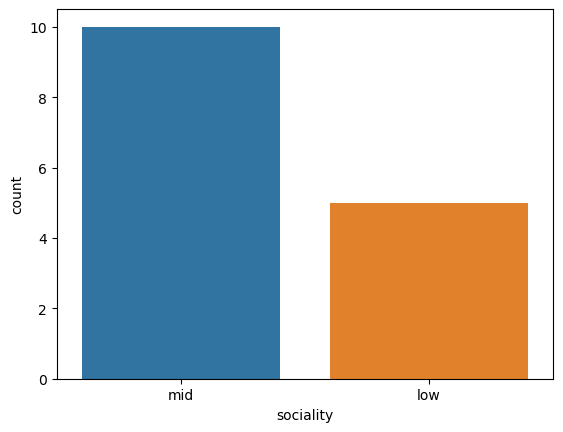

In [21]:
sns.countplot(df,x='sociality')

Generally, a weak user community is dangerous for a cryptocurrency, but this data shows that cryptocurrencies with an average user community were also an attractive target for 51% attacks.

D:\python setup j\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


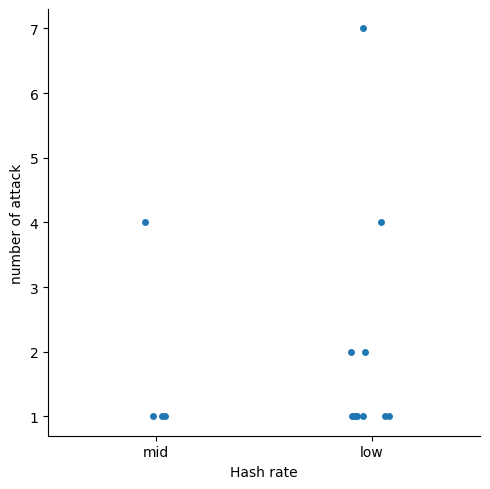

In [25]:
sns.catplot(x='Hash rate',y='number of attack',data=df,kind='strip')

<Axes: xlabel='Hash rate', ylabel='number of attack'>

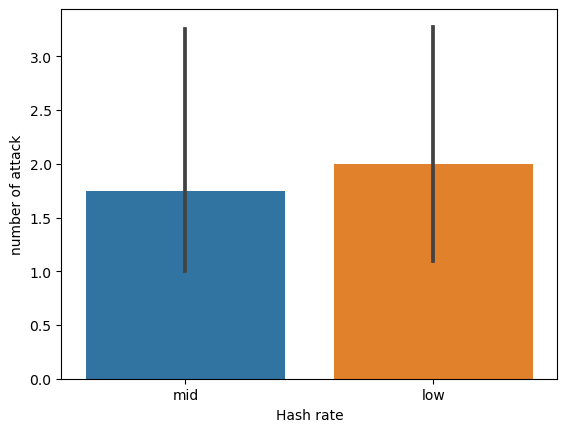

In [27]:
sns.barplot(x='Hash rate',y='number of attack',data=df) 

<Axes: xlabel='sociality', ylabel='number of attack'>

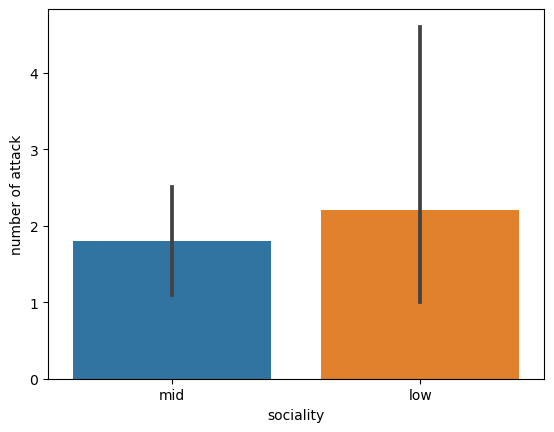

In [28]:
sns.barplot(x='sociality',y='number of attack',data=df) 

<Axes: xlabel='successful', ylabel='number of attack'>

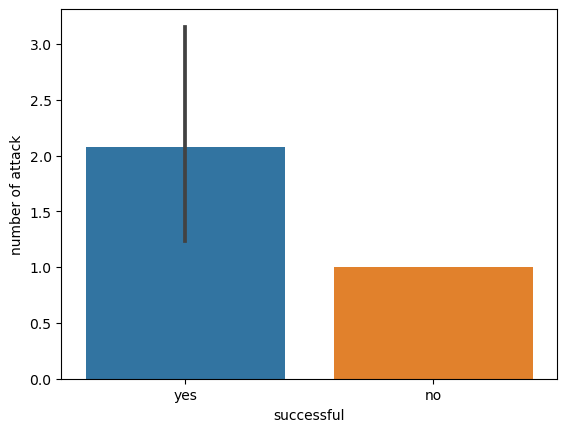

In [29]:
sns.barplot(x='successful',y='number of attack',data=df) 

## 3.Data Cleaning

In [3]:
new_df=df.drop(['Name','Hash algorithm'], axis=1)
new_df.head()

,number of attack,successful,consensus,Hash rate,sociality
number,,,,,
1,4,yes,PoW,mid,mid
2,1,yes,PoW,low,mid
3,1,yes,PoW,low,mid
4,1,no,PoW,mid,mid
5,2,yes,PoW,low,mid


In [4]:
new_df.isnull().sum()

number of attack    0
successful          0
consensus           0
Hash rate           0
sociality           0
dtype: int64

In [5]:
total_attack = new_df['number of attack'].sum()
total_attack

29

## 4.Handling Text and Categorical Attributes

In [6]:
s = sorted(new_df['successful'].unique())
z=zip(s, range(0, len(s) + 1))
gm = dict(z)
new_df['successful'].head(5)
new_df['successful'] = new_df['successful'].map(gm).astype(int)
new_df

,number of attack,successful,consensus,Hash rate,sociality
number,,,,,
1,4,1,PoW,mid,mid
2,1,1,PoW,low,mid
3,1,1,PoW,low,mid
4,1,0,PoW,mid,mid
5,2,1,PoW,low,mid
6,1,1,PoW,low,low
7,1,1,PoW,low,low
8,1,1,PoW,low,mid
9,1,1,PoW,low,mid


In [7]:
p = sorted(new_df['Hash rate'].unique())
m=zip(p, range(0, len(p) + 1))
tm = dict(m)
new_df['Hash rate'].head(5)
new_df['Hash rate'] = new_df['Hash rate'].map(tm).astype(int)
new_df

,number of attack,successful,consensus,Hash rate,sociality
number,,,,,
1,4,1,PoW,1,mid
2,1,1,PoW,0,mid
3,1,1,PoW,0,mid
4,1,0,PoW,1,mid
5,2,1,PoW,0,mid
6,1,1,PoW,0,low
7,1,1,PoW,0,low
8,1,1,PoW,0,mid
9,1,1,PoW,0,mid


In [8]:
p2 = sorted(new_df['sociality'].unique())
m2=zip(p2, range(0, len(p) + 1))
tm2 = dict(m2)
new_df['sociality'].head(5)
new_df['sociality'] = new_df['sociality'].map(tm2).astype(int)
new_df

,number of attack,successful,consensus,Hash rate,sociality
number,,,,,
1,4,1,PoW,1,1
2,1,1,PoW,0,1
3,1,1,PoW,0,1
4,1,0,PoW,1,1
5,2,1,PoW,0,1
6,1,1,PoW,0,0
7,1,1,PoW,0,0
8,1,1,PoW,0,1
9,1,1,PoW,0,1


## 5.training and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = new_df['successful']

In [11]:
X = new_df[['number of attack','Hash rate','sociality']]

The consensus algorithm is vulnerable with PoW. Other algorithms (PoS,PoW,...) is almost safe.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3 ,random_state=101)

### train model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm=LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.13274336 -0.59292035 -0.10619469]


### test model

In [17]:
predictions = lm.predict(X_test)

In [18]:
y_test

number
14    1
3     1
4     0
13    1
11    1
Name: successful, dtype: int32

In [19]:
predictions

array([1.02654867, 0.89380531, 0.30088496, 1.79646018, 0.40707965])

In [21]:
round_array = np.array([round(i) for i in predictions]) 
round_array

array([1, 1, 0, 2, 0])

The test data has a significant match with the training data. Outputs that produce digits greater than 1 should be replaced by 1.

In [25]:
round_array[3]=1
round_array[3]

1

In [26]:
round_array

array([1, 1, 0, 1, 0])

Text(0.5, 0, 'Predicted Y')

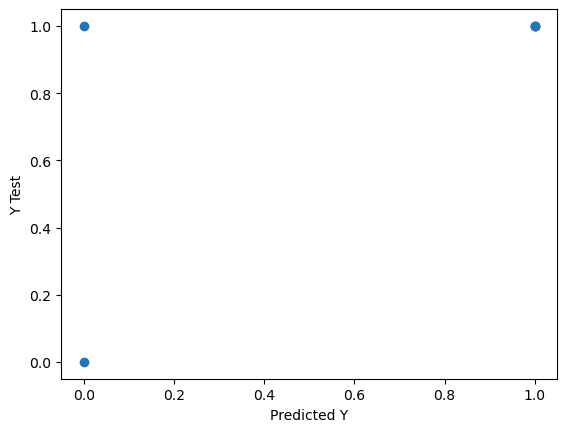

In [27]:
plt.scatter(round_array, y_test)
plt.ylabel('Y Test')
plt.xlabel('Predicted Y')

D:\python setup j\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


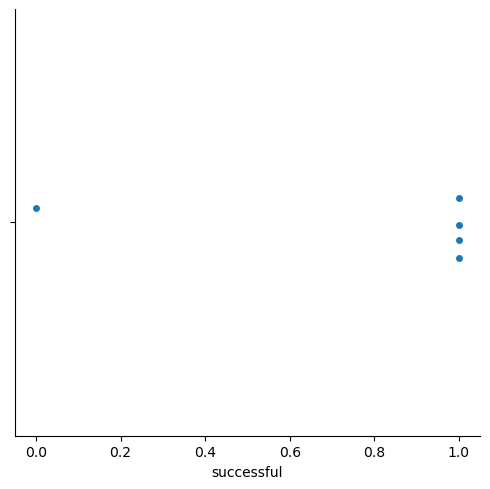

In [28]:
sns.catplot(x=y_test, kind='strip')

D:\python setup j\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


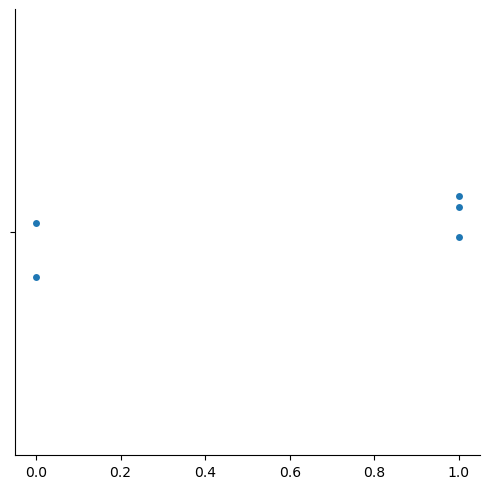

In [31]:
sns.catplot(x=round_array, kind='strip')

## 6.Evaluating the model

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, round_array))
print('MSE:', metrics.mean_squared_error(y_test, round_array))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, round_array)))

MAE: 0.2
MSE: 0.2
RMSE: 0.4472135954999579
